In [1]:
import pandas as pd
from sklearn import preprocessing

In [3]:
from google.colab import files
uploaded = files.upload()

Saving credit_card_transactions.csv to credit_card_transactions.csv


In [5]:
df = pd.read_csv('credit_card_transactions.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [6]:
df_dropped = df.copy()

In [7]:
df_dropped = df_dropped.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'gender', 'street', 'lat', 'long', 'dob','trans_num','merch_lat', 'merch_long', 'unix_time'])

In [8]:
df_dropped['merch_zipcode'] = df_dropped['merch_zipcode'].fillna(df_dropped['zip'])

In [9]:
df_copy = df_dropped.copy()
df_copy = df_copy[df_copy['amt'] < 10000]

In [10]:
le = preprocessing.LabelEncoder()
#df_copy['category'] = le.fit_transform(df_copy['category'])
dummies = pd.get_dummies(df_copy['category'], drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, dummies], axis=1)

In [11]:
df_copy = df_copy.drop(columns=['category'])
df_copy.head()

,trans_date_trans_time,merchant,amt,city,state,zip,city_pop,job,is_fraud,merch_zipcode,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",4.97,Moravian Falls,NC,28654,3495,"Psychologist, counselling",0,28705.0,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",107.23,Orient,WA,99160,149,Special educational needs teacher,0,99160.0,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,220.11,Malad City,ID,83252,4154,Nature conservation officer,0,83236.0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",45.00,Boulder,MT,59632,1939,Patent attorney,0,59632.0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,41.96,Doe Hill,VA,24433,99,Dance movement psychotherapist,0,22844.0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
df_copy['is_fraud'].value_counts()

,count
is_fraud,
0,1289135
1,7506


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df_copy.copy()
df_scaled[['amt', 'zip', 'city_pop', 'merch_zipcode']] = scaler.fit_transform(df_scaled[['amt', 'zip', 'city_pop', 'merch_zipcode']])
df_scaled.head()

,trans_date_trans_time,merchant,amt,city,state,zip,city_pop,job,is_fraud,merch_zipcode,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",-0.469521,Moravian Falls,NC,-0.749142,-0.282589,"Psychologist, counselling",0,-0.754769,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",0.269247,Orient,WA,1.872566,-0.293670,Special educational needs teacher,0,1.874991,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,1.084737,Malad City,ID,1.281040,-0.280406,Nature conservation officer,0,1.280622,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",-0.180328,Boulder,MT,0.402750,-0.287742,Patent attorney,0,0.399593,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,-0.202290,Doe Hill,VA,-0.906096,-0.293835,Dance movement psychotherapist,0,-0.973533,...,0,0,0,0,0,1,0,0,0,0


In [18]:
df_scaled['trans_date_trans_time'] = pd.to_datetime(df_scaled['trans_date_trans_time'])

In [22]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296641 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296641 non-null  datetime64[ns]
 1   merchant               1296641 non-null  object        
 2   amt                    1296641 non-null  float64       
 3   city                   1296641 non-null  object        
 4   state                  1296641 non-null  object        
 5   zip                    1296641 non-null  float64       
 6   city_pop               1296641 non-null  float64       
 7   job                    1296641 non-null  object        
 8   is_fraud               1296641 non-null  int64         
 9   merch_zipcode          1296641 non-null  float64       
 10  food_dining            1296641 non-null  int64         
 11  gas_transport          1296641 non-null  int64         
 12  grocery_net            1296641 no

In [24]:
# prompt: in the column trans_date_trans_time drop all the non fraud rows

df_fraud = df_scaled[df_scaled['is_fraud'] == 1]
df_fraud.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,count
trans_date_trans_time,merchant,amt,city,state,zip,city_pop,job,is_fraud,merch_zipcode,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,
2019-01-02 01:06:37,fraud_Rutherford-Mertz,1.525065,Collettsville,NC,-0.750741,-0.291232,Soil scientist,1,-0.757046,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2019-12-22 23:32:26,fraud_Rutherford-Mertz,1.949354,Kirby,OH,-0.203427,-0.293772,Private music teacher,1,-0.204705,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2019-12-23 03:03:26,"fraud_Kutch, Hermiston and Farrell",-0.363394,Brashear,MO,0.547805,-0.291497,Private music teacher,1,0.609698,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-23 02:07:59,fraud_Murray Ltd,-0.390991,Brashear,MO,0.547805,-0.291497,Private music teacher,1,0.545909,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2019-12-23 01:39:29,"fraud_Gottlieb, Considine and Schultz",5.905149,De Soto,KS,0.640208,-0.275087,Chief Executive Officer,1,0.639297,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-20 03:38:17,"fraud_Tillman, Dickinson and Labadie",-0.342154,Randolph,OH,-0.168660,-0.293994,Mechanical engineer,1,-0.175964,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2019-06-20 00:09:37,"fraud_Schumm, Bauch and Ondricka",1.716656,Randolph,OH,-0.168660,-0.293994,Mechanical engineer,1,-0.173986,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2019-06-19 23:22:54,"fraud_Nienow, Barrows and Romaguera",-0.394098,Tyler,TX,1.000337,0.183260,Sports development officer,1,0.997733,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [49]:
df_fraud['year'] = df_fraud['trans_date_trans_time'].dt.year
df_fraud['month'] = df_fraud['trans_date_trans_time'].dt.month
df_fraud['day'] = df_fraud['trans_date_trans_time'].dt.day
df_fraud['hour'] = df_fraud['trans_date_trans_time'].dt.hour
df_fraud['day_name'] = df_fraud['trans_date_trans_time'].dt.day_name()
df_fraud['month_name'] = df_fraud['trans_date_trans_time'].dt.month_name()

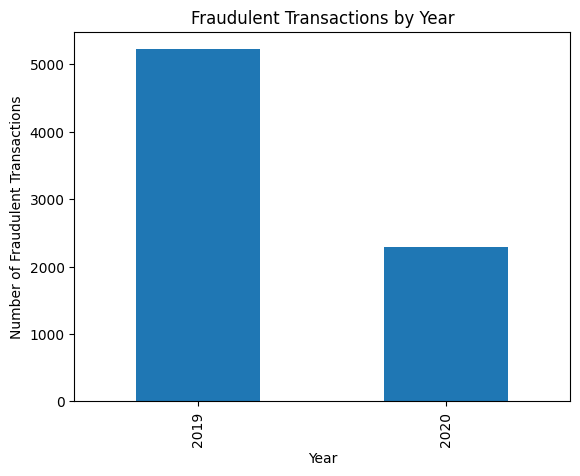

In [50]:
df_fraud['year'].value_counts().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Fraudulent Transactions by Year")
plt.show()

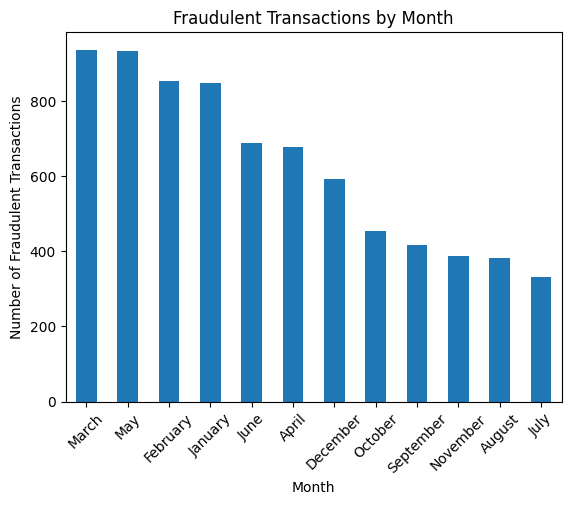

In [52]:
df_fraud['month_name'].value_counts().plot(kind='bar')
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Fraudulent Transactions by Month")
plt.show()

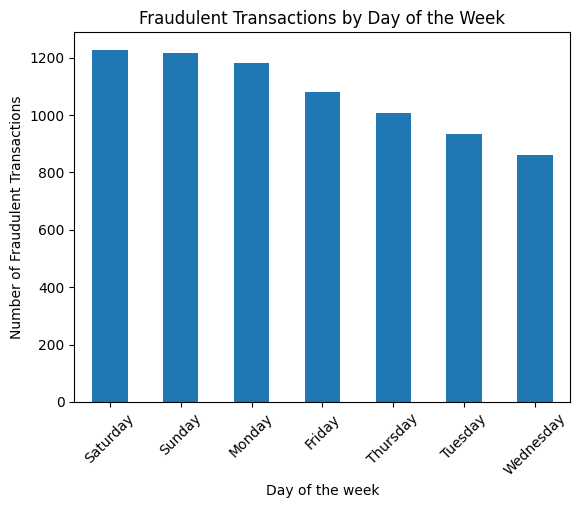

In [46]:
df_fraud['day_name'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel("Day of the week")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Fraudulent Transactions by Day of the Week")
plt.show()

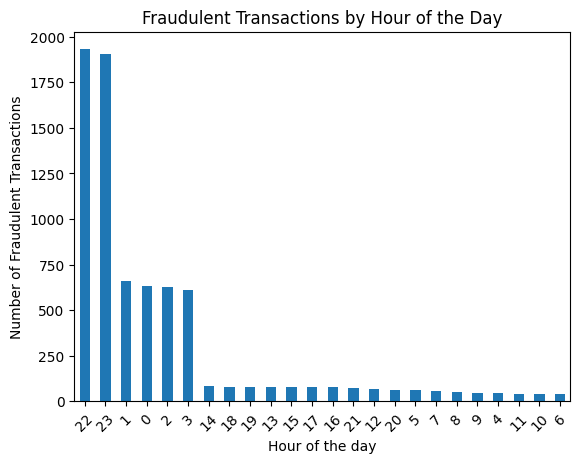

In [60]:
df_fraud['hour'].value_counts().plot(kind='bar')
plt.xlabel("Hour of the day")
plt.xticks(rotation=45)
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Fraudulent Transactions by Hour of the Day")
plt.show()

In [64]:
def datetime_graph(df_fraud, column):
    df_fraud[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.ylabel("Number of Fraudulent Transactions")
    plt.title(f"Fraudulent Transactions by {column}")
    plt.show()

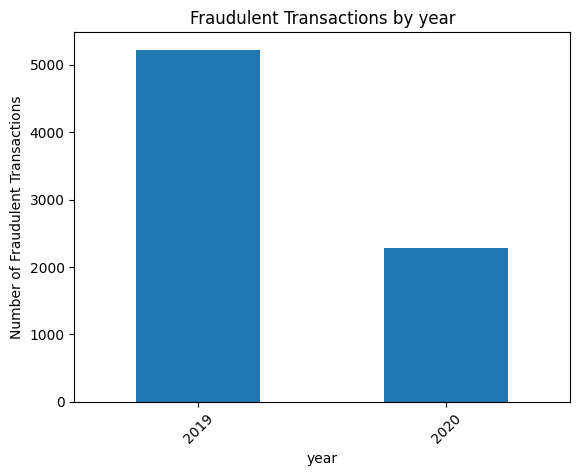

In [67]:
datetime_graph(df_fraud, 'year')
